In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from Utils import *
from Models import *

import matplotlib 
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 

Using TensorFlow backend.


In [2]:
filename = "/work/data/logs/new/aae_m1_200M_QQ_ml15_limit1_2018_09_01_02:08:34.res"
df = pd.read_csv(filename, header=None, names=["model","time", "iter", "loss", "MayFlower", "JuneFlower", "JulyFlower", "quora", "para", "sts"])
# df2 = pd.read_csv(filename.replace(".res", ".semi_model.csv"), header=None, sep=",")
df3 = pd.read_csv(filename.replace(".res", ".model.csv"), header=0, sep=";")

In [36]:
def read(filename, limit=None):
    df = pd.read_csv(filename, header=None, names=["model","time", "iter", "loss", "MayFlower", "JuneFlower", "JulyFlower", "Quora", "Paraphrase", "STS"])
    if limit != None:
        return df[:limit].to_dict()
    return df.to_dict()
def read2(filename):
    df = pd.read_csv(filename, header=None, names=["model","time", "iter", "loss", "val_loss", "MayFlower", "JuneFlower", "JulyFlower", "Quora", "Paraphrase", "STS"])
    return df.to_dict()
def read_df(filename):
    df = pd.read_csv(filename, header=None, names=["model","time", "iter", "loss", "MayFlower", "JuneFlower", "JulyFlower", "Quora", "Paraphrase", "STS"])
    return df
def read_df2(filename):
    df = pd.read_csv(filename, header=None, names=["model","time", "iter", "loss", "val_loss", "MayFlower", "JuneFlower", "JulyFlower", "Quora", "Paraphrase", "STS"])
    return df

def read_model_csv(filename):
    df = pd.read_csv(filename, header=None, names=["model","time", "iter", "loss", "val_loss", "MayFlower", "JuneFlower", "JulyFlower", "Quora", "Paraphrase", "STS"])
    return df

def agg_results(run, mode="mean"):
    res = []
    for i in ["MayFlower", "JuneFlower", "JulyFlower", "Quora", "Paraphrase", "STS"]:
        res.append("%.4f" % np.mean(list(run[i].values())) if mode == "mean" else np.max(list(run[i].values())))
    return ", ".join(str(x) for x in res)

def read_model(filename):
    return pd.read_csv(filename, header=0, sep=";" )


In [4]:
def visualise(results, focus=["MayFlower", "JuneFlower", "JulyFlower", "Quora", "Paraphrase", "STS"], legends=None, save=None, earlyStop=None, width=18, height=2, mode="large"):
    
    plt.figure(figsize=(width, height))
    
    plt_num = len(focus)
    
    for i in range(plt_num):
        plt.subplot(1, plt_num, i+1)
        
        for r in results:
            if earlyStop != None:
                plt.plot([(i+1) for i in range(earlyStop)], r[1][focus[i]][:earlyStop])
            else:
                plt.plot([(i+1) for i in range(len(r[focus[i]]))], list(r[focus[i]].values()))
                
        plt.title(focus[i], fontsize=18)
        plt.xlabel('Iterations', fontsize=18)
        
        

    if legends == None:
        plt.legend([i["model"][0] for i in results],bbox_to_anchor=(1.04,1), loc="upper left", prop={'size':18})
    else:
        plt.legend([i for i in legends],bbox_to_anchor=(1.04,1), loc="upper left", prop={'size':18})


    plt.subplots_adjust(wspace=0.3)
    if save != None:
        plt.savefig('/work/png/%s' %save, bbox_inches='tight',pad_inches=1, dpi=300)
    plt.show()

In [564]:
df = read_df("/work/data/logs/new/all/s2s_m1_200M_QQ_ml15_limit1_2018_09_01_17:18:07.res")

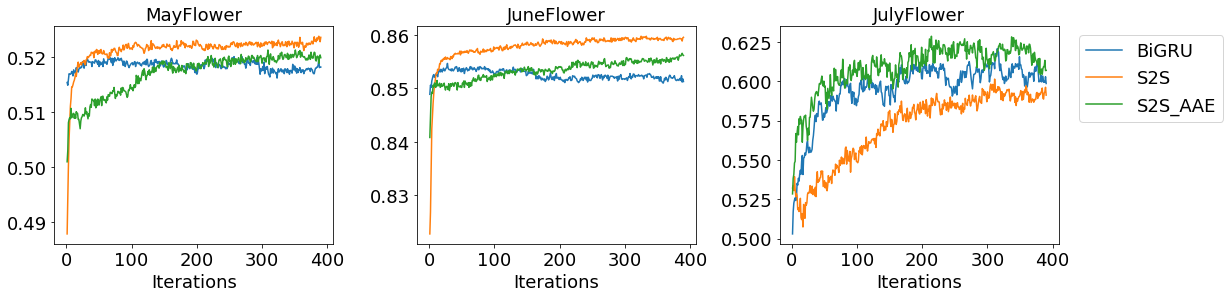

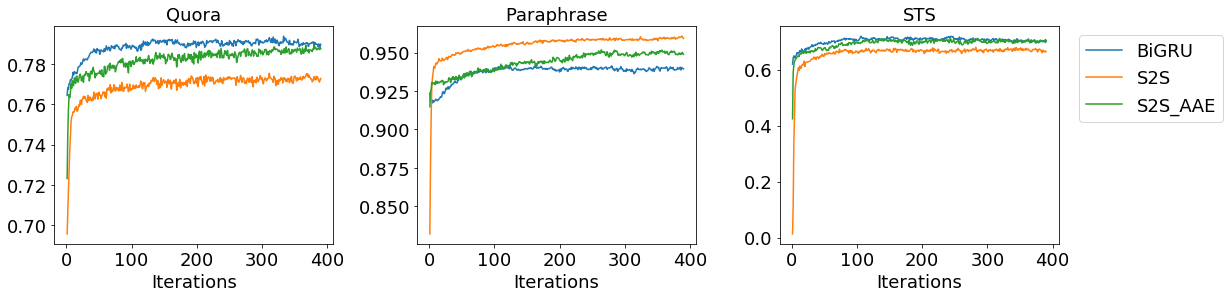

In [43]:
iter_num = int(10000000/25600)

small_dssm = read("/work/data/logs/new/all/dssm_gru_m1_200M_QQ_ml15_limit1_2018_09_01_16:37:29.res", iter_num)
aae_s2s = read("/work/data/logs/new/all/aae_s2s_m1_200M_QQ_ml15_limit1_2018_09_01_16:12:08.res", iter_num)
# run3 = read("/work/data/logs/new/all/dssm_aae_s2s_m1_200M_QQ_ml15_limit1_2018_09_01_17:27:19.res")
s2s = read("/work/data/logs/new/all/s2s_m1_200M_QQ_ml15_limit1_2018_09_01_17:18:07.res", iter_num)
# visualise([run1, run2, run4])

visualise([small_dssm, s2s, aae_s2s], focus=["MayFlower", "JuneFlower", "JulyFlower"], save="10M_s2s", height=4, legends=["BiGRU", "S2S", "S2S_AAE"])
visualise([small_dssm, s2s, aae_s2s], focus=["Quora", "Paraphrase", "STS"], save="10M_s2s_aae", height=4, legends=["BiGRU", "S2S", "S2S_AAE"])

# column = "JulyFlower"
# ax = run1[column].plot()
# run2[column].plot(ax=ax)
# run3[column].plot(ax=ax)
# run4[column].plot(ax=ax)

# for i in ["MayFlower", "JuneFlower", "JulyFlower", "quora", "para", "sts"]:
#     visualise([run1, run2, run3, run4], focus=[i])


In [42]:
for i in [s2s, aae_s2s, small_dssm]:
    print(agg_results(i, "max"))

0.5238, 0.8598, 0.6013, 0.7755, 0.9607, 0.6791
0.5213, 0.8566, 0.6285, 0.7895, 0.9518, 0.7113
0.5201, 0.8547, 0.6206, 0.7939, 0.9415, 0.7188


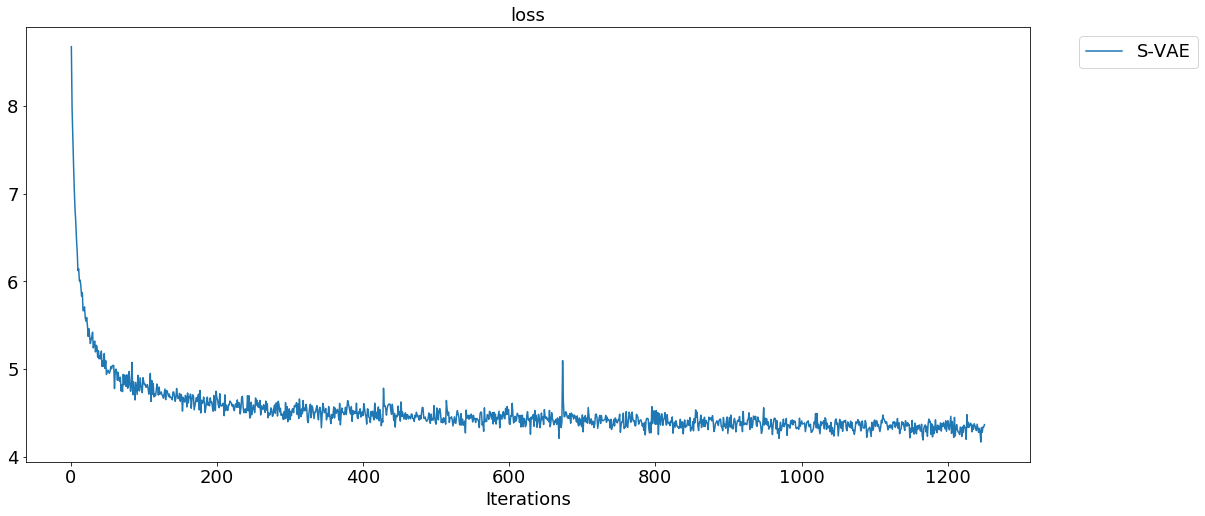

In [38]:
visualise([vae], focus=["loss"], save="vae_loss", height=8, legends=["S-VAE"])


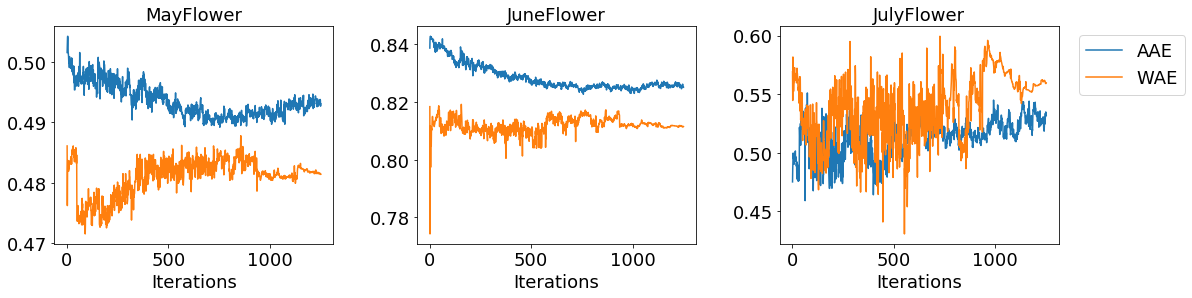

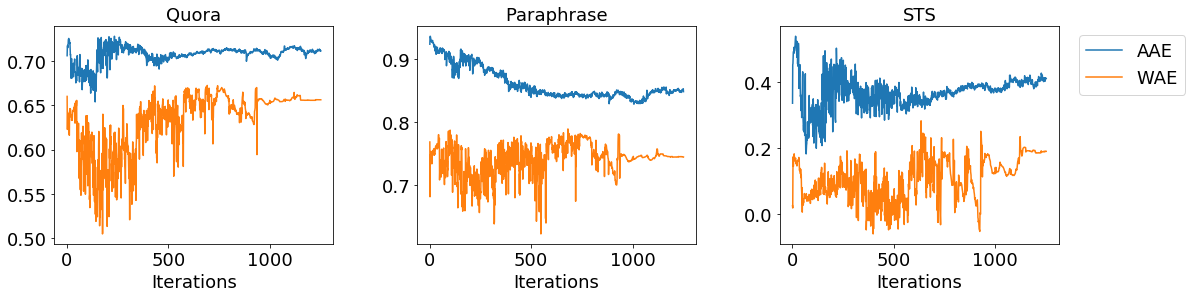

In [13]:

# 50M
iter_num = int(50000000/40000)
aae = read("/work/data/logs/new/aae_m1_200M_QQ_ml15_limit1_2018_09_01_02:08:34.res", iter_num)
vae = read("/work/data/logs/new/vae_m1_200M_QQ_ml15_limit1_2018_09_01_02:22:16.res", iter_num)
vae_kl = read("/work/data/logs/new/vae_kl_m1_200M_QQ_ml15_limit1_2018_09_01_02:31:47.res", iter_num)
wae = read("/work/data/logs/new/wae_m1_200M_QQ_ml15_limit1_2018_09_01_02:22:09.res", iter_num)
kate = read("/work/data/logs/new/all/kate_bow_m1_200M_QQ_ml15_limit1_2018_09_02_03:10:46.res", iter_num)
vae_bow = read("/work/data/logs/new/all/vae_bow_m1_200M_QQ_ml15_limit1_2018_09_02_02:00:57.res", iter_num)

# visualise([vae, vae_kl], focus=["loss"])
# visualise([aae], focus=["loss"])
# visualise([wae], focus=["loss"])

visualise([aae, wae], focus=["MayFlower", "JuneFlower", "JulyFlower"], save="50M_QQ_AEs1", height=4, legends=["AAE", "WAE"])
visualise([aae, wae], focus=["Quora", "Paraphrase", "STS"], save="50M_QQ_AEs2", height=4, legends=["AAE", "WAE"])


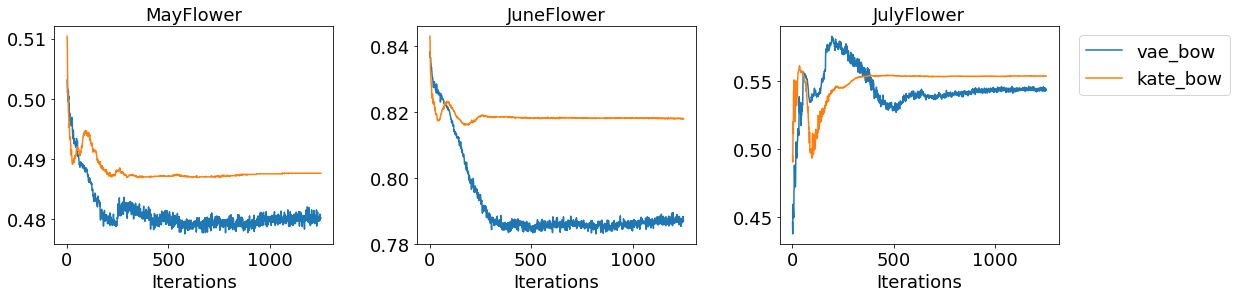

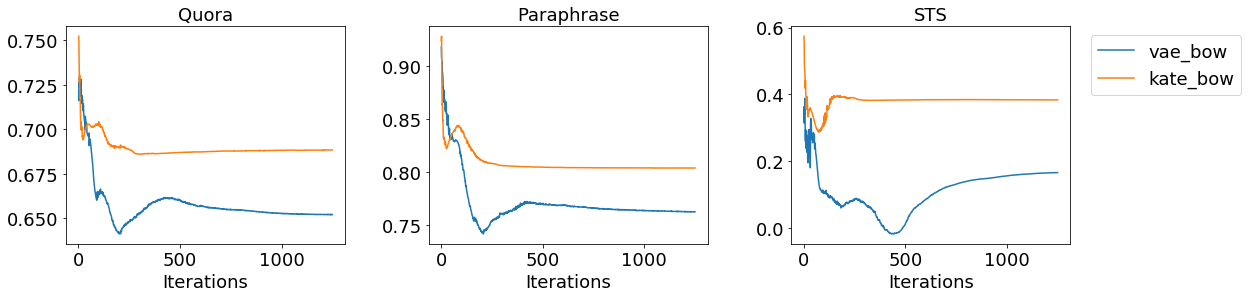

In [595]:
visualise([vae_bow, kate], focus=["MayFlower", "JuneFlower", "JulyFlower"], height=4)
visualise([vae_bow, kate], focus=["Quora", "Paraphrase", "STS"], height=4)


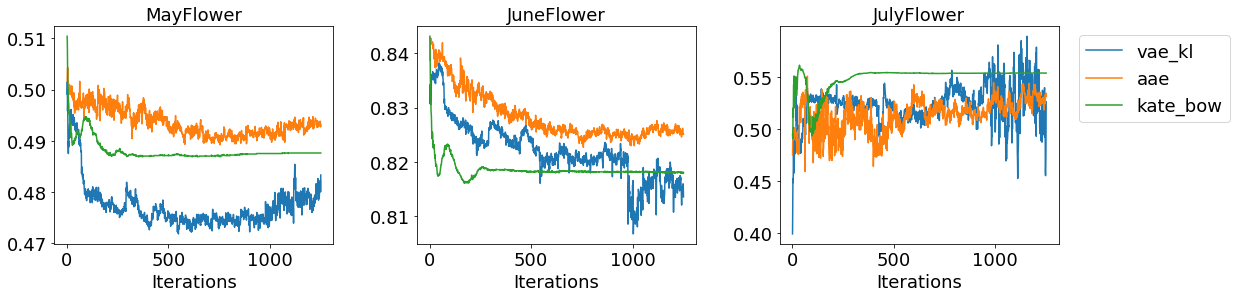

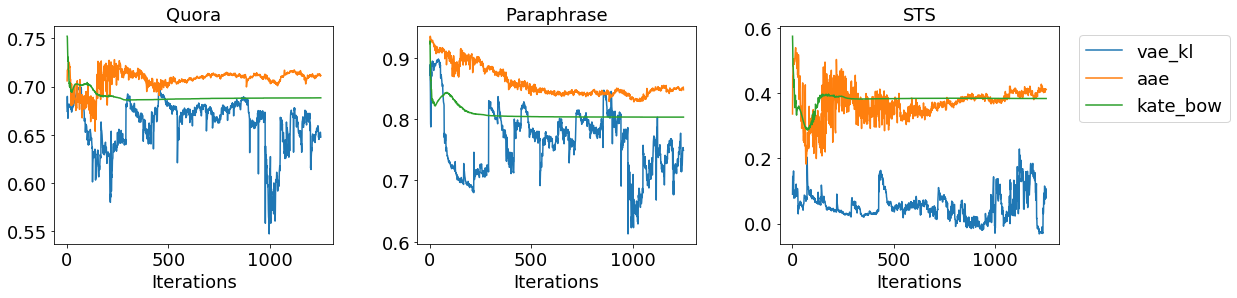

In [32]:
visualise([vae_kl, aae, kate], focus=["MayFlower", "JuneFlower", "JulyFlower"], height=4, save="unsupervised1")
visualise([vae_kl, aae, kate], focus=["Quora", "Paraphrase", "STS"], height=4, save="unsupervised2")

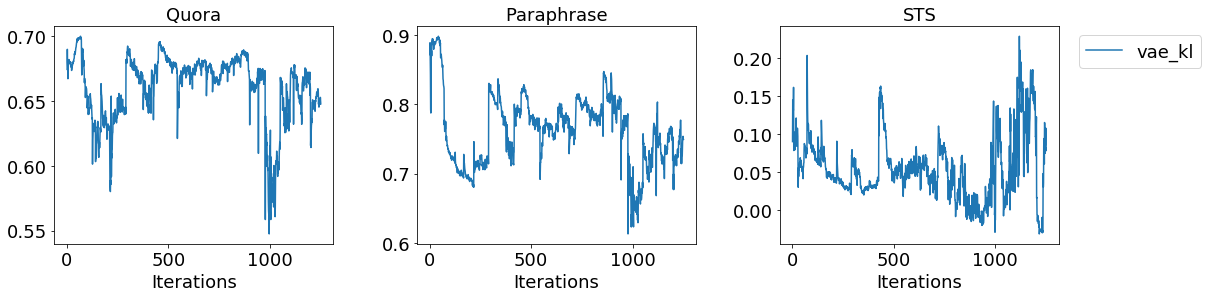

In [41]:
visualise([vae_kl], focus=["Quora", "Paraphrase", "STS"], height=4, save="vae")


In [542]:
for i in [vae, vae_kl, aae, wae, vae_bow, kate]:
    print(agg_results(i))

0.4757, 0.8218, 0.5038, 0.6377, 0.7531, 0.0341
0.4773, 0.8221, 0.5233, 0.6605, 0.7622, 0.0546
0.4936, 0.8284, 0.5132, 0.7074, 0.8602, 0.3689
0.4810, 0.8120, 0.5387, 0.6336, 0.7416, 0.1068
0.4811, 0.7916, 0.5445, 0.6577, 0.7707, 0.1118
0.4880, 0.8186, 0.5496, 0.6895, 0.8085, 0.3797


In [515]:
df = pd.read_csv("/work/data/logs/vae_m1_200M_QQ_ml15_limit1_2018_08_30_20:53:16.text", sep=":", header=None)

In [528]:
df[-300:]

,0,1
975,little chute community scholarships,deer chute community scholarships <eos> ...
976,akron ohio internet providers,akron ohio internet providers
977,pharmaceutical sales force effectiveness ...,pharmaceutical accounting factor effectivenes...
978,how does copper turn on a lat he,does arctic copper turn on a lat he <eos>
979,ch irt in van dy ne pa c,po y m wil painter ril let c <eos>
980,sacred heart mn ob itu aries <unk>,sacred heart burn one itu aries <unk> <eos> ...
981,animal feeds with high vitamin b,animal breeding with high gains b <unk>
982,ideals for spa day for <unk> year old,guild for for for for <unk> 00 old <eos>
983,kl ove phoenix,kl <unk> university <eos>
984,whitmore commercial grade garment,whitmore commercial grade garment <eos> ...


In [527]:
vae['loss'][1000]

4.3756

In [491]:
for i in [vae, vae_kl, aae, wae, kate]:
    print(agg_results(i))

0.4764, 0.8215, 0.5067, 0.6438, 0.7657, 0.0538
0.4780, 0.8197, 0.5226, 0.6587, 0.7574, 0.0661
0.4935, 0.8283, 0.5136, 0.7078, 0.8595, 0.3726
0.4809, 0.8117, 0.5403, 0.6350, 0.7423, 0.1158
0.4879, 0.8183, 0.5517, 0.6891, 0.8062, 0.3811


# 100M QQ Experiment on Supervised Models

In [16]:
# 100M
dssm = read("/work/data/logs/dssm_gru_m1_200M_QQ_ml15_limit1_2018_08_30_20:36:22.res", int(100000000/512))
s2s = read("/work/data/logs/s2s_m1_200M_QQ_ml15_limit1_2018_08_30_20:37:31.res", int(100000000/512))
dssm_aae = read("/work/data/logs/dssm_aae_m1_200M_QQ_ml15_limit102400_2018_08_31_02:32:31.res", int(100000000/512))
dssm_wae = read("/work/data/logs/dssm_wae_m1_200M_QQ_ml15_limit1_2018_08_31_02:59:46.res", int(100000000/512))
dssm_vae_kl = read("/work/data/logs/dssm_vae_kl_m1_200M_QQ_ml15_limit1_2018_08_31_02:44:20.res", int(100000000/512))
dssm_pra = read("/work/data/logs/dssm_pra_m1_200M_QQ_ml15_limit1_2018_08_31_17:05:16.res", int(100000000/512))

In [45]:
df = read_df("/work/data/logs/s2s_m1_200M_QQ_ml15_limit1_2018_08_30_20:37:31.res")

In [46]:
df

,model,time,iter,loss,MayFlower,JuneFlower,JulyFlower,Quora,Paraphrase,STS
0,s2s,77.8s,51200,6.5583,0.4900,0.8219,0.5196,0.6950,0.8398,0.0201
1,s2s,59.9s,102400,6.0343,0.4967,0.8307,0.5310,0.7083,0.8874,0.1405
2,s2s,59.8s,153600,5.8268,0.5030,0.8402,0.5423,0.7203,0.9193,0.3323
3,s2s,59.6s,204800,5.4706,0.5063,0.8454,0.5600,0.7286,0.9300,0.4719
4,s2s,61.3s,256000,5.4296,0.5105,0.8485,0.5466,0.7424,0.9370,0.5783
5,s2s,61.6s,307200,5.2767,0.5133,0.8508,0.5335,0.7484,0.9388,0.5988
6,s2s,59.0s,358400,4.9753,0.5150,0.8522,0.5179,0.7500,0.9414,0.5957
7,s2s,61.2s,409600,4.9425,0.5164,0.8530,0.5249,0.7535,0.9424,0.6072
8,s2s,58.8s,460800,4.9754,0.5163,0.8538,0.5224,0.7537,0.9445,0.6122
9,s2s,59.5s,512000,4.6783,0.5166,0.8545,0.5263,0.7576,0.9441,0.6181


In [545]:
for i in [dssm, dssm_vae_kl, dssm_aae, dssm_wae, dssm_pra]:
    print(agg_results(i))

0.5203, 0.8546, 0.6143, 0.7937, 0.9432, 0.7004
0.5210, 0.8544, 0.6148, 0.7927, 0.9468, 0.7072
0.5209, 0.8540, 0.6161, 0.7928, 0.9463, 0.7146
0.5208, 0.8540, 0.6106, 0.7925, 0.9466, 0.7151
0.5195, 0.8524, 0.5967, 0.7891, 0.9455, 0.7020


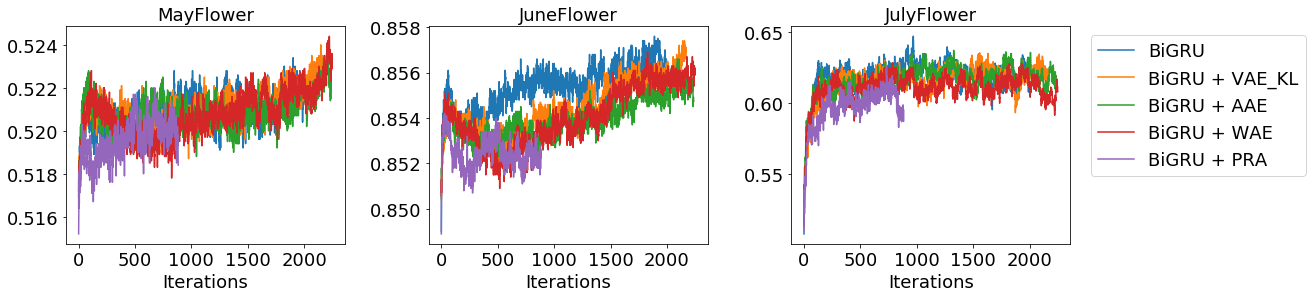

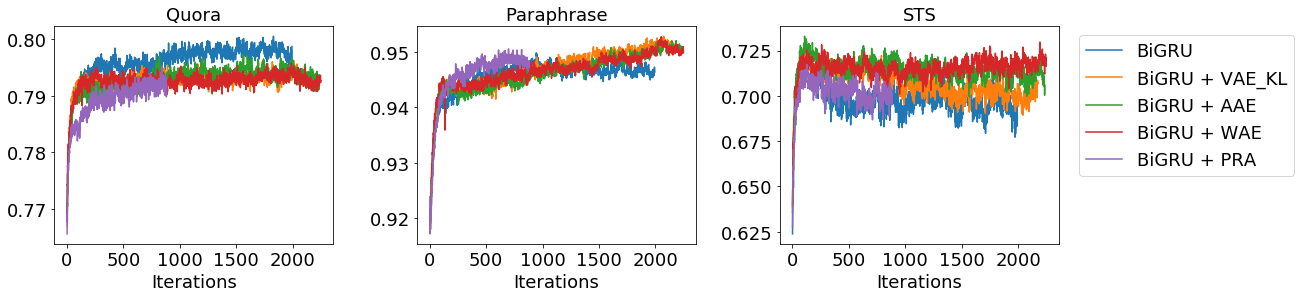

In [18]:

visualise([dssm, dssm_vae_kl, dssm_aae, dssm_wae, dssm_pra], focus=["MayFlower", "JuneFlower", "JulyFlower"], save="end2end1", height=4, legends=["BiGRU", "BiGRU + VAE_KL", "BiGRU + AAE", "BiGRU + WAE", "BiGRU + PRA"])
visualise([dssm, dssm_vae_kl, dssm_aae, dssm_wae, dssm_pra], focus=["Quora", "Paraphrase", "STS"], save="end2end2", height=4, legends=["BiGRU", "BiGRU + VAE_KL", "BiGRU + AAE", "BiGRU + WAE", "BiGRU + PRA"])


# for i in ["MayFlower", "JuneFlower", "JulyFlower", "quora", "para", "sts", "loss"]:
#     visualise([dssm, dssm_aae, dssm_wae, dssm_vae_kl], focus=[i])

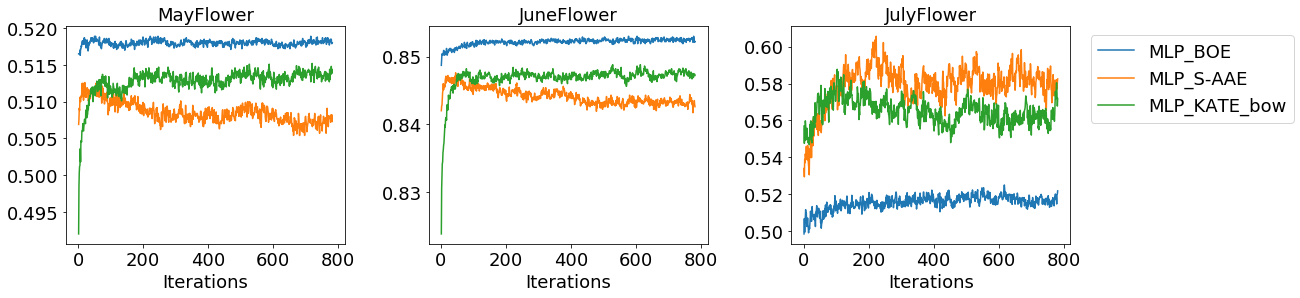

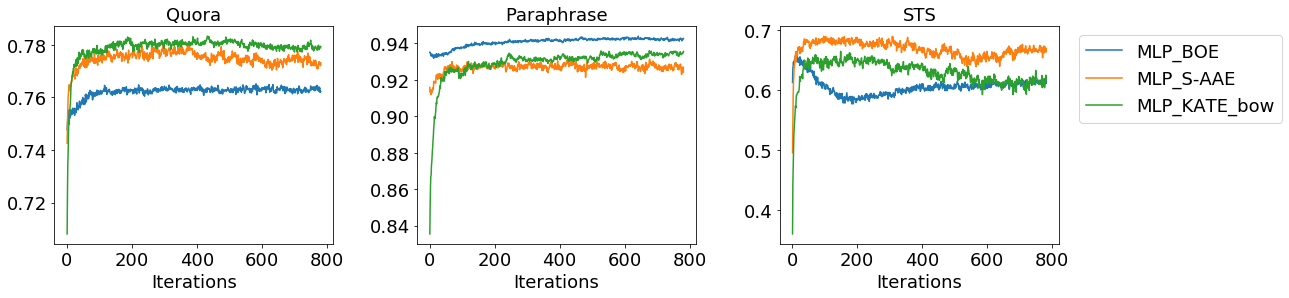

In [71]:
# CLF 200M
iter_num = int(20000000/25600)
clf_bpe_vae_kl = read("/work/data/logs/new/all/clf_bpe_ae_m1_200M_QQ_ml15_limit1_2018_09_02_03:37:31.res", iter_num)
clf_bpe = read("/work/data/logs/new/all/clf_bpe_m1_200M_QQ_ml15_limit1_2018_09_02_03:36:47.res", iter_num)
dssm = read("/work/data/logs/dssm_gru_m1_200M_QQ_ml15_limit1_2018_08_30_20:36:22.res", iter_num)

clf_aae = read("/work/data/logs/new/all/clf_aae_m1_200M_QQ_ml15_limit1_2018_09_02_03:47:36.res", iter_num)
clf_bpe_aae = read("/work/data/logs/new/all/clf_bpe_aae_m1_200M_QQ_ml15_limit1_2018_09_02_03:49:24.res", iter_num)
clf_kate_bow = read("/work/data/logs/new/all/clf_kate_bow_m1_200M_QQ_ml15_limit1_2018_09_02_12:07:54.res", iter_num)

clf_vae_bow = read("/work/data/logs/new/all/clf_vae_bow_m1_200M_QQ_ml15_limit1_2018_09_02_20:57:42.res", iter_num)
clf_wae = read("/work/data/logs/new/all/clf_wae_m1_200M_QQ_ml15_limit1_2018_09_02_20:58:33.res", iter_num)
clf_vae_kl = read("/work/data/logs/new/all/clf_vae_kl_m1_200M_QQ_ml15_limit1_2018_09_02_21:08:19.res", iter_num)
clf_aae_last = read("/work/data/logs/new/all/clf_aae_last_m1_200M_QQ_ml15_limit1_2018_09_03_19:51:31.res", iter_num)
clf_vae = read("/work/data/logs/new/all/clf_vae_m1_200M_QQ_ml15_limit1_2018_09_04_18:00:11.res", iter_num)


visualise([clf_bpe, clf_aae, clf_kate_bow], focus=["MayFlower", "JuneFlower", "JulyFlower"], legends=["MLP_BOE", "MLP_S-AAE", "MLP_KATE_bow"], height=4, save="mlp1")
visualise([clf_bpe, clf_aae, clf_kate_bow], focus=["Quora", "Paraphrase", "STS"], legends=["MLP_BOE", "MLP_S-AAE", "MLP_KATE_bow"], height=4, save="mlp2")
# visualise([clf_bpe, clf_aae])
# visualise([clf_bpe, clf_aae, clf_aae_last])
# visualise([clf_vae, clf_aae])


In [499]:
for i in [clf_bpe, clf_vae, clf_vae_kl, clf_aae, clf_wae, clf_vae_bow, clf_kate_bow]:
    print(agg_results(i))

0.5180, 0.8521, 0.5157, 0.7622, 0.9407, 0.6051
0.4914, 0.8314, 0.5282, 0.7174, 0.8369, 0.3919
0.5069, 0.8418, 0.5676, 0.7626, 0.9167, 0.6189
0.5086, 0.8441, 0.5792, 0.7748, 0.9268, 0.6679
0.4957, 0.8313, 0.5437, 0.7392, 0.8546, 0.4831
0.5098, 0.8447, 0.5568, 0.7757, 0.9236, 0.6098
0.5127, 0.8469, 0.5651, 0.7790, 0.9294, 0.6288


In [51]:
df = read_df("/work/data/logs/new/vae_kl_m1_200M_QQ_ml15_limit1_2018_09_01_02:31:47.res")


In [57]:
122 * 1799 /3600 


60.96611111111111

In [68]:
# df = read_df("/work/data/logs/new/all/vae_bow_m1_200M_QQ_ml15_limit1_2018_09_02_02:03:04.res")
df = read_df("/work/data/logs/new/all/kate_bow_m1_200M_QQ_ml15_limit1_2018_09_02_03:10:46.res")
df = read_df("/work/data/logs/new/all/aae_m1_200M_QQ_ml15_limit1_2018_09_02_21:12:21.res")

In [60]:
70 * 2290 /3600/24

1.8553240740740742

In [69]:
np.sum([float(i.replace("s","")) for i in df.time.tolist()])/3600/24

3.1432291666666665

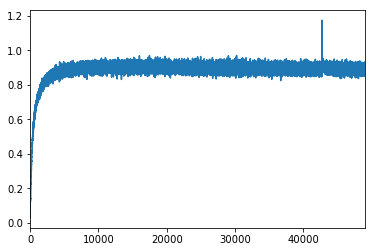

In [165]:
vae_model['kl_loss'].plot()

In [144]:
vae

,model,time,iter,loss,MayFlower,JuneFlower,JulyFlower,quora,para,sts
0,vae,98.2s,40000,8.6737,0.5020,0.8320,0.4453,0.6731,0.8741,0.0749
1,vae,93.9s,80000,7.9692,0.5048,0.8344,0.4725,0.6779,0.8856,0.1412
2,vae,105.7s,120000,7.6277,0.4993,0.8321,0.4492,0.6650,0.8393,0.1062
3,vae,94.6s,160000,7.3316,0.4945,0.8300,0.4993,0.6577,0.7846,0.0817
4,vae,92.5s,200000,7.0482,0.4882,0.8295,0.4963,0.6622,0.8035,0.0230
5,vae,94.8s,240000,6.8268,0.4872,0.8321,0.4816,0.6618,0.8520,-0.0008
6,vae,98.5s,280000,6.6844,0.4898,0.8333,0.4548,0.6656,0.8777,-0.0183
7,vae,95.5s,320000,6.4843,0.4895,0.8337,0.4674,0.6614,0.8737,-0.0324
8,vae,96.1s,360000,6.3381,0.4882,0.8330,0.4856,0.6630,0.8759,-0.0246
9,vae,98.9s,400000,6.1232,0.4900,0.8348,0.4865,0.6619,0.8718,-0.0255


In [173]:
dssm_aae_s_10240 = read("/work/data/logs/new/val/dssm_aae_s_10240_m1_200M_QQ_ml15_limit10240_2018_09_01_07:16:09.res")
dssm_10240 = read("/work/data/logs/new/val/dssm_gru_m1_200M_QQ_ml15_limit10240_2018_09_01_06:39:30.res")

In [181]:
dssm_10240[:5]


,model,time,iter,loss,MayFlower,JuneFlower,JulyFlower,quora,para,sts
dssm_gru,38.1s,10240,0.5669,0.4300,0.5149,0.8474,0.5015,0.7603,0.9279,0.6038
dssm_gru,23.7s,20480,0.5513,0.4184,0.5152,0.8483,0.5082,0.7640,0.9243,0.6114
dssm_gru,25.8s,30720,0.5166,0.4072,0.5156,0.8486,0.5095,0.7620,0.9214,0.6219
dssm_gru,22.2s,40960,0.4963,0.3959,0.5166,0.8490,0.5123,0.7617,0.9204,0.6236
dssm_gru,22.3s,51200,0.4847,0.3862,0.5159,0.8492,0.5077,0.7624,0.9204,0.6298


In [182]:
dssm_aae_s_10240[:5]

,model,time,iter,loss,MayFlower,JuneFlower,JulyFlower,quora,para,sts
dssm_aae_s_10240,76.3s,10240,0.6409,0.4741,0.5131,0.8454,0.5310,0.7515,0.9341,0.5434
dssm_aae_s_10240,53.6s,20480,0.6089,0.4291,0.5111,0.8463,0.5266,0.7554,0.9313,0.6026
dssm_aae_s_10240,51.5s,30720,0.5767,0.4000,0.5111,0.8475,0.5334,0.7589,0.9328,0.6245
dssm_aae_s_10240,50.2s,40960,0.5374,0.3803,0.5120,0.8477,0.5335,0.7628,0.9361,0.6356
dssm_aae_s_10240,52.8s,51200,0.5166,0.3630,0.5127,0.8479,0.5450,0.7623,0.9365,0.6505


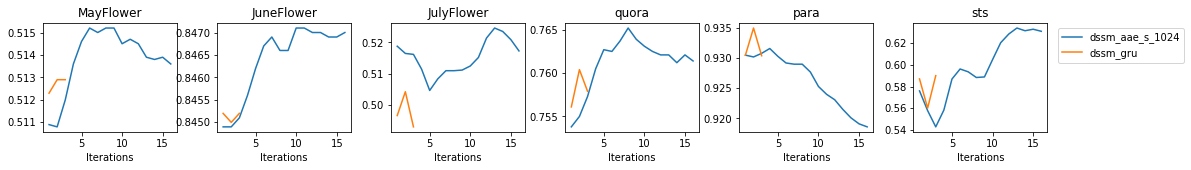

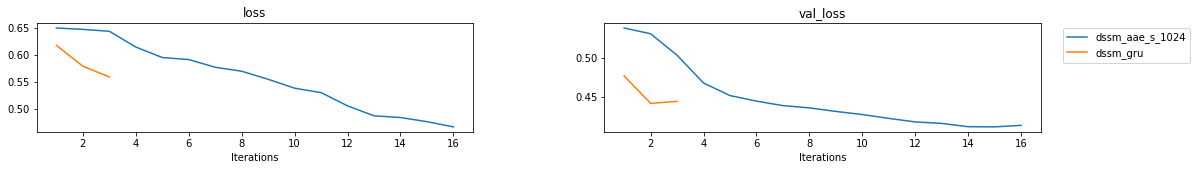

In [300]:
dssm_aae_s_1024 = read2("/work/data/logs/new/all/dssm_aae_s_1024_m1_200M_QQ_ml15_limit1024_2018_09_01_21:02:28.res")
dssm_1024 = read2("/work/data/logs/new/all/dssm_gru_m1_200M_QQ_ml15_limit1024_2018_09_01_21:08:55.res")

visualise([dssm_aae_s_1024, dssm_1024])
visualise([dssm_aae_s_1024, dssm_1024], focus=["loss", "val_loss"])

In [301]:
dssm_1024

{'JulyFlower': {0: 0.4967, 1: 0.5043, 2: 0.4931},
 'JuneFlower': {0: 0.8452, 1: 0.845, 2: 0.8452},
 'MayFlower': {0: 0.5123, 1: 0.5129, 2: 0.5129},
 'iter': {0: 1024, 1: 2048, 2: 3072},
 'loss': {0: 0.6173, 1: 0.5791, 2: 0.5593},
 'model': {0: 'dssm_gru', 1: 'dssm_gru', 2: 'dssm_gru'},
 'para': {0: 0.9305, 1: 0.935, 2: 0.9304},
 'quora': {0: 0.7561, 1: 0.7604, 2: 0.7579},
 'sts': {0: 0.587, 1: 0.5602, 2: 0.59},
 'time': {0: '27.1s', 1: '11.9s', 2: '13.6s'},
 'val_loss': {0: 0.4766, 1: 0.4416, 2: 0.4442}}

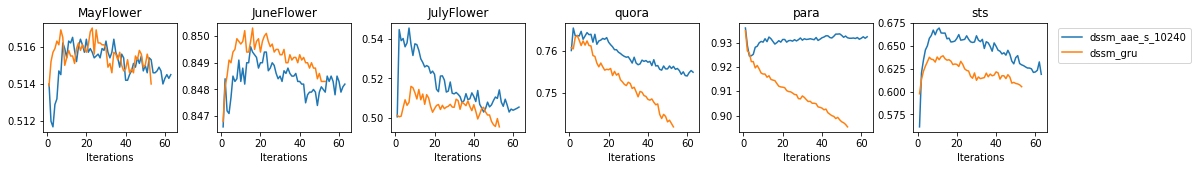

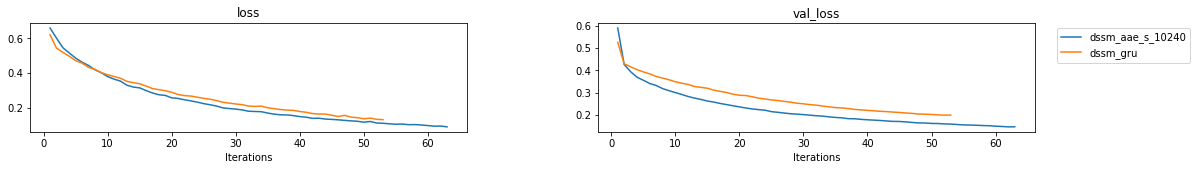

In [299]:
dssm_aae_s_10240 = read2("/work/data/logs/new/all/dssm_aae_s_10240_m1_200M_QQ_ml15_limit10240_2018_09_01_21:13:23.res")
dssm_10240 = read2("/work/data/logs/new/all/dssm_gru_m1_200M_QQ_ml15_limit10240_2018_09_01_22:14:04.res")

visualise([dssm_aae_s_10240, dssm_10240])
visualise([dssm_aae_s_10240, dssm_10240], focus=["loss", "val_loss"])

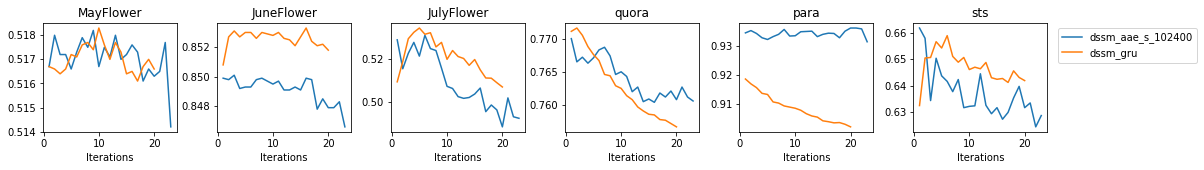

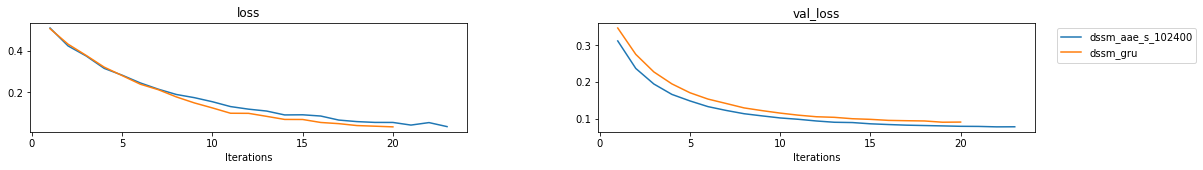

In [359]:
dssm_aae_s_102400 = read2("/work/data/logs/new/all/dssm_aae_s_102400_m1_200M_QQ_ml15_limit102400_2018_09_02_00:02:16.res")
dssm_102400 = read2("/work/data/logs/new/all/dssm_gru_m1_200M_QQ_ml15_limit102400_2018_09_02_00:02:14.res")

visualise([dssm_aae_s_102400, dssm_102400])
visualise([dssm_aae_s_102400, dssm_102400], focus=["loss", "val_loss"])